In [1]:
%run "data_processing.ipynb"


Remaining rows:  6848


In [42]:
import matplotlib.pyplot as plt
import scipy as sp
from sklearn import linear_model
colums = df_atus.columns
FEATURE_COLS = ['HH_SIZE', 'FAMINCOME', 'POVERTY130', 'POVERTY185',
       'POVERTYLEVEL', 'FOODSTAMP', 'WIC', 'HHTENURE', 'HH_CHILD', 'HOUSETYPE',
       'HH_NUMKIDS', 'HH_SIZE_CPS8', 'HH_CHILD_CPS8', 'QFAMINCOME', 'PERNUM',
       'LINENO', 'WT06', 'AGE', 'SEX', 'RACE', 'MARST', 'GENHEALTH', 'HEIGHT',
       'WEIGHT', 'BMI', 'EH_RESP', 'PED', 'SED_EAT', 'FOODSHOP', 'MEALPREP',
       'SODA', 'DIETSODA', 'MILK', 'MEAT', 'STORE', 'STREASON', 'EXERCISE',
       'EXFREQ', 'FASTFD', 'FASTFDFREQ', 'FDTHERM', 'ENOUGHFD', 'ANYSECDRK',
       'ANYSECEAT']
CONTINUOUS_FEATURES = ['HH_SIZE', 'HH_CHILD',
                        'AGE',
                      'PED', 'SED_EAT', 'EXFREQ', 'FASTFDFREQ']
# cannot include weight and height because these are directly associated with
# BMI
EXCLUDED_CONTINUOUS_FEATURES = ['HEIGHT', 'WEIGHT']
CATEGORICAL_FEATURES = ['FAMINCOME', 'POVERTY130', 'POVERTY185',
                       'POVERTYLEVEL', 'FOODSTAMP', 'WIC',
                       'HHTENURE', 'HOUSETYPE', 'QFAMINCOME',
                       'GENHEALTH', 'SEX', 'RACE', 'MARST',
                       'EH_RESP', 'FOODSHOP', 'MEALPREP',
                       'SODA', 'DIETSODA', 'MILK', 'MEAT', 'STORE', 'STREASON', 'EXERCISE',
                       'FASTFD', 'FDTHERM', 'ENOUGHFD', 'ANYSECDRK',
                       'ANYSECEAT']

In [11]:
#This block of code checks for features less than 99. 99 is the code for unreported. low means are categoricals.
dont_work = ['RACE', 'POVERTY130', 'POVERTY185','SEX']

for x in CATEGORICAL_FEATURES:
        if x not in dont_work:
            q = (df_atus[x] < 90)
            if (len(x)<=6):
                x2= x + "     "
            else:
                x2 = x
            #print(x2,"\t",   max(df_atus[q][x]),np.sum(q), int(np.mean(df_atus[q][x])))

for x in CONTINUOUS_FEATURES:
        if x not in dont_work:
            q = (df_atus[x] < 90) 
            if (len(x)<=6):
                x2= x + "     "
            else:
                x2 = x
                
            #print(x2,  "\t",max(df_atus[q][x]),np.sum([(df_atus[x] < 90)]), int(np.mean(df_atus[q][x])))



NOTES: 
96 = refuse, 97 = dont know 99 = not in universe.

TODO:
GENHEALTH, FOODSHOP, FOODSHOP REASON. EXFREQ

01	Excellent	
02	Very good	
03	Good	
04	Fair	
05	Poor	

Notes to self
---------------
FEATURES:
ALLDAYEAT
[1 or 0]
Secondary eating all day
Possible story: ALLDAYEAT is good and healthy, low bmi, at less more oftne.


PED
Total time in primary eating and drinking (in minutes)
PED is a 4-digit numeric variable reported in minutes. 

SED_DRINK
Total time in secondary drinking (in minutes)
SED_DRINK is a 5-digit numeric variable reported in minutes. 

FOODSHOP
ATUS respondent usually does the food shopping, is the food shoper.
yes,no,split, [1,2,3]

MEALPREP
ATUS respondent usually does the meal preparation
123

SODA, consume soda?
12

DIETSODA
01 diet,
02, reg
03, both

MILK, Unpasteurized or raw milk in last 7 days
12

MEAT, Prepared any meals with meat, poultry or seafood in last 7 days
12

STORE, Place where majority of groceries purchased?
1 grocery store
2 super center
3 warehouse club
4 drugstore
5 other

STREASON? reasons to buy @ prefer. [HEALTH PREFERENCE, price concious, quality concious] 
price
loca
qual
vari
customer
service

EXERCISE [ weekly excerise]
12
EXFREQ [ frequency]

PRPMEL = 
Purchased prepared food in last seven days []

--------

Variables to test;




In [11]:
ON_OFF_FEATURES = ['ALLDAYEAT','SODA','MILK','MEAT','EXERCISE','PRPMEL'] #
THREE_OPTIONS = ['FOODSHOP','MEALPREP','DIETSODA']
SKIP_LIST = ['ALLDAYEAT','PRPMEL'] #can run if re-extract, currently missing;
FIVE_OPTIONS = ['GENHEALTH', 'STORE' ]
SIX_OPTIONS = ['STREASON']
#PRPMEL : Are you the person who usually prepares the meals in your household?


def show_results( feature_list, df_input, ignore_above ):
    
    name_stats = {}
    name_rows = {}
    
    for x in feature_list:
        if (x in SKIP_LIST):
            continue;
        else:
            t_name  = str(x)
        
            #These are counts
            t_on    = np.sum([(df_input[x] == 1)])
            t_off   = np.sum([(df_input[x] == 2)])
            t_both  = np.sum([(df_input[x] == 3)]) #or split
            t_4     = np.sum([(df_input[x] == 4)])
            t_5     = np.sum([(df_input[x] == 5)])
            t_6     = np.sum([(df_input[x] == 6)])
                             
            t_valid = np.sum([(df_input[x] < ignore_above)])
            t_total = np.sum(df_input[x])
            
            #These are the actual df_rows
            r_on    = df_input.loc[df_input[x] == 1]
            r_off   = df_input.loc[df_input[x] == 2]
            r_both  = df_input.loc[df_input[x] == 3]
            r_4     = df_input.loc[df_input[x] == 4]
            r_5     = df_input.loc[df_input[x] == 5]
            r_6     = df_input.loc[df_input[x] == 6]
            
            r_valid = df_input.loc[df_input[x] < ignore_above]
            
            t_zero  = np.sum([(df_input[x] == 0)])
            tab = "\t"
            
            if t_zero > 1:
                print ("warning, there is zeros")
                raise NameError('ZEROS')
            
            print("Feature Name        : ",t_name)
            print("# of ONs            : ",t_on,tab,t_on/t_valid*100)
            print("# of OFFs           : ",t_off,tab,t_off/t_valid*100)
            if (np.sum([(df_atus[x] == 3)]) > 0):
                print("# of BOTHs/SPLITs   : ",t_both,tab,t_both/t_valid*100)
            print("# of KNOWN RESPONSE : ", t_valid,tab,t_valid/t_total*100)
            #print("# of TOTAL RESPONSE : ", int(t_total))
            print("-----------------------")
            #print("")
            
            name_stats[t_name] = [0,t_on,t_off,t_both,t_4,t_5,t_6,t_valid,t_total]
            name_rows[t_name] = [0,r_on,r_off,r_both,r_4,r_5,r_6,r_valid] 
            
    return name_stats, name_rows
        
        
print("More Exploration for discrete features: \n")
RESULTS_ON_OFF = show_results(ON_OFF_FEATURES,df_atus,90)
RESULTS_THREE = show_results(THREE_OPTIONS,df_atus,90)
RESULTS_FIVE     = show_results(FIVE_OPTIONS,df_atus,90)
RESULTS_SIX      = show_results(SIX_OPTIONS,df_atus,90)
                             
                            


More Exploration for discrete features: 

Feature Name        :  SODA
# of ONs            :  1652 	 36.243966652
# of OFFs           :  2906 	 63.756033348
# of KNOWN RESPONSE :  4558 	 1.94649903486
-----------------------
Feature Name        :  MILK
# of ONs            :  82 	 1.65222647592
# of OFFs           :  4881 	 98.3477735241
# of KNOWN RESPONSE :  4963 	 2.52643260386
-----------------------
Feature Name        :  MEAT
# of ONs            :  4365 	 87.9331184529
# of OFFs           :  599 	 12.0668815471
# of KNOWN RESPONSE :  4964 	 2.58454169161
-----------------------
Feature Name        :  EXERCISE
# of ONs            :  4401 	 64.2951059167
# of OFFs           :  2444 	 35.7048940833
# of KNOWN RESPONSE :  6845 	 71.4509394572
-----------------------
Feature Name        :  FOODSHOP
# of ONs            :  4275 	 62.436103403
# of OFFs           :  1772 	 25.8799474222
# of BOTHs/SPLITs   :  800 	 11.6839491748
# of KNOWN RESPONSE :  6847 	 66.3726250485
-----------------

FROM CDC
Below 18.5	Underweight
18.5 – 24.9	Normal or Healthy Weight
25.0 – 29.9	Overweight
30.0 and Above	Obese


In [8]:
OB_RANGE = [30,99,"OBESE"] 
OW_RANGE = [25,30,"OVER"]
NW_RANGE = [18.5,25,"NORMAL"]
UW_RANGE = [12,18.5,"UNDER"]

BMI_RANGES = [OB_RANGE,OW_RANGE,NW_RANGE,UW_RANGE]
BACKGROUND_BMI_RATES = []

for bmi in BMI_RANGES:
    df_temp = df_atus
    temp_sum = df_temp[ (df_temp['BMI']>=bmi[0]) & (df_temp['BMI']<bmi[1])]
    temp_sum = len(temp_sum)
    temp_percent = temp_sum/6848
    info = [bmi[2],temp_sum,temp_percent]
    info = temp_percent
    BACKGROUND_BMI_RATES.append(info)
    




TOTAL CASES:     1652
SODA 1 OBESE 	 567 	 34.3220338983 %    OFF :5.90497782354
SODA 1 OVER 	 583 	 35.2905569007 %    OFF :-0.238064594601
SODA 1 NORMAL 	 477 	 28.8740920097 %    OFF :-5.55931920527
SODA 1 UNDER 	 25 	 1.51331719128 %    OFF :-0.10759402367



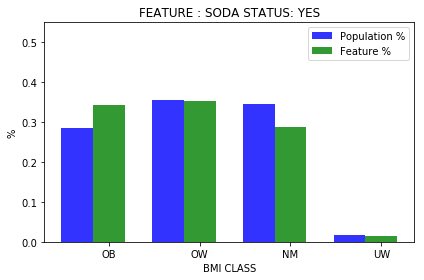

----------------------------------------------------------------------------------
TOTAL CASES:     2906
SODA 2 OBESE 	 747 	 25.7054370268 %    OFF :-2.71161904793
SODA 2 OVER 	 997 	 34.3083275981 %    OFF :-1.22029389725
SODA 2 NORMAL 	 1116 	 38.40330351 %    OFF :3.96989229503
SODA 2 UNDER 	 46 	 1.58293186511 %    OFF :-0.0379793498466



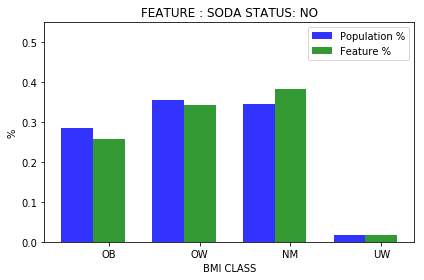

----------------------------------------------------------------------------------
TOTAL CASES:     82
MILK 1 OBESE 	 28 	 34.1463414634 %    OFF :5.72928538865
MILK 1 OVER 	 31 	 37.8048780488 %    OFF :2.27625655345
MILK 1 NORMAL 	 19 	 23.1707317073 %    OFF :-11.2626795076
MILK 1 UNDER 	 4 	 4.87804878049 %    OFF :3.25713756553



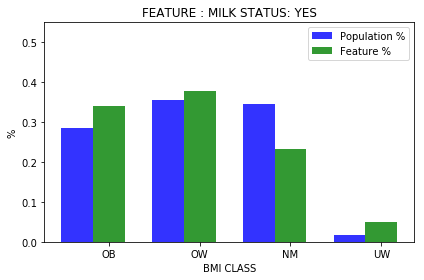

----------------------------------------------------------------------------------
TOTAL CASES:     4881
MILK 2 OBESE 	 1406 	 28.8055726286 %    OFF :0.388516553793
MILK 2 OVER 	 1704 	 34.9108789183 %    OFF :-0.617742577073
MILK 2 NORMAL 	 1700 	 34.8289284983 %    OFF :0.395517283305
MILK 2 UNDER 	 71 	 1.45461995493 %    OFF :-0.166291260026



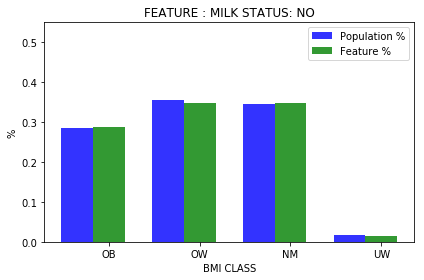

----------------------------------------------------------------------------------
TOTAL CASES:     4365
MEAT 1 OBESE 	 1267 	 29.0263459336 %    OFF :0.609289858796
MEAT 1 OVER 	 1543 	 35.3493699885 %    OFF :-0.179251506782
MEAT 1 NORMAL 	 1492 	 34.1809851088 %    OFF :-0.252426106133
MEAT 1 UNDER 	 63 	 1.44329896907 %    OFF :-0.177612245881



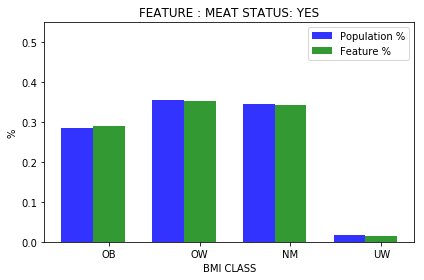

----------------------------------------------------------------------------------
TOTAL CASES:     599
MEAT 2 OBESE 	 167 	 27.8797996661 %    OFF :-0.537256408656
MEAT 2 OVER 	 189 	 31.5525876461 %    OFF :-3.97603384925
MEAT 2 NORMAL 	 231 	 38.5642737896 %    OFF :4.1308625747
MEAT 2 UNDER 	 12 	 2.00333889816 %    OFF :0.38242768321



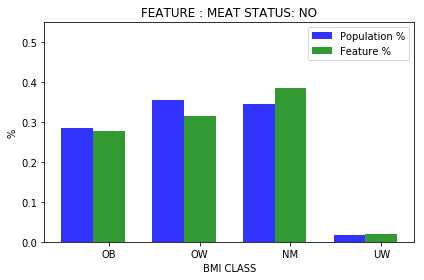

----------------------------------------------------------------------------------
TOTAL CASES:     4401
EXERCISE 1 OBESE 	 1092 	 24.812542604 %    OFF :-3.60451347081
EXERCISE 1 OVER 	 1596 	 36.2644853442 %    OFF :0.735863848913
EXERCISE 1 NORMAL 	 1647 	 37.4233128834 %    OFF :2.98990166848
EXERCISE 1 UNDER 	 66 	 1.49965916837 %    OFF :-0.121252046582



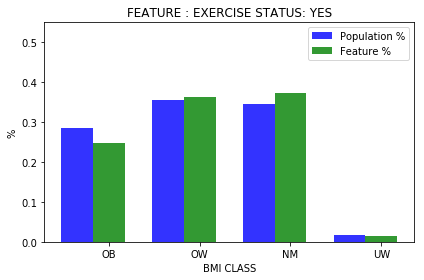

----------------------------------------------------------------------------------
TOTAL CASES:     2444
EXERCISE 2 OBESE 	 854 	 34.9427168576 %    OFF :6.52566078284
EXERCISE 2 OVER 	 836 	 34.2062193126 %    OFF :-1.32240218272
EXERCISE 2 NORMAL 	 709 	 29.0098199673 %    OFF :-5.42359124769
EXERCISE 2 UNDER 	 45 	 1.84124386252 %    OFF :0.220332647567



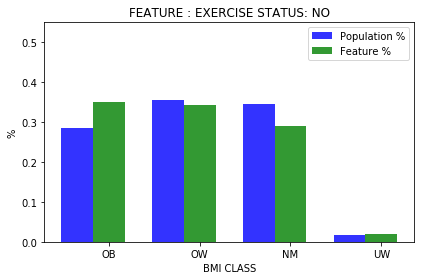

----------------------------------------------------------------------------------
TOTAL CASES:     4275
FOODSHOP 1 OBESE 	 1221 	 28.5614035088 %    OFF :0.144347434006
FOODSHOP 1 OVER 	 1505 	 35.2046783626 %    OFF :-0.323943132754
FOODSHOP 1 NORMAL 	 1488 	 34.8070175439 %    OFF :0.373606328906
FOODSHOP 1 UNDER 	 61 	 1.4269005848 %    OFF :-0.194010630158



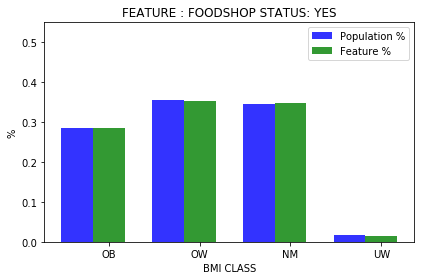

----------------------------------------------------------------------------------
TOTAL CASES:     1772
FOODSHOP 2 OBESE 	 486 	 27.4266365688 %    OFF :-0.990419505918
FOODSHOP 2 OVER 	 649 	 36.625282167 %    OFF :1.09666067172
FOODSHOP 2 NORMAL 	 596 	 33.6343115124 %    OFF :-0.799099702538
FOODSHOP 2 UNDER 	 41 	 2.31376975169 %    OFF :0.69285853674



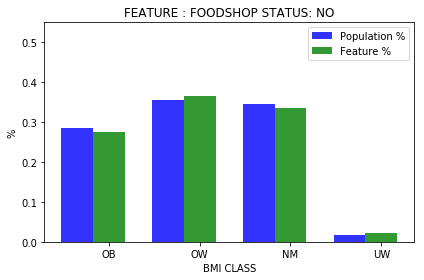

----------------------------------------------------------------------------------
TOTAL CASES:     800
FOODSHOP 3 OBESE 	 239 	 29.875 %    OFF :1.45794392523
FOODSHOP 3 OVER 	 279 	 34.875 %    OFF :-0.653621495327
FOODSHOP 3 NORMAL 	 273 	 34.125 %    OFF :-0.308411214953
FOODSHOP 3 UNDER 	 9 	 1.125 %    OFF :-0.495911214953



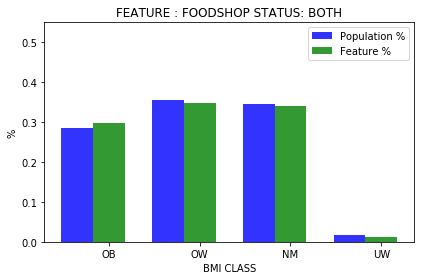

----------------------------------------------------------------------------------
TOTAL CASES:     4290
MEALPREP 1 OBESE 	 1243 	 28.9743589744 %    OFF :0.557302899593
MEALPREP 1 OVER 	 1507 	 35.1282051282 %    OFF :-0.400416367122
MEALPREP 1 NORMAL 	 1476 	 34.4055944056 %    OFF :-0.0278168093589
MEALPREP 1 UNDER 	 64 	 1.49184149184 %    OFF :-0.129069723112



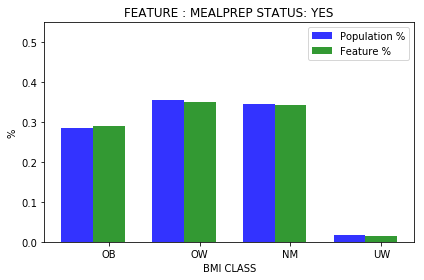

----------------------------------------------------------------------------------
TOTAL CASES:     1875
MEALPREP 2 OBESE 	 510 	 27.2 %    OFF :-1.21705607477
MEALPREP 2 OVER 	 696 	 37.12 %    OFF :1.59137850467
MEALPREP 2 NORMAL 	 633 	 33.76 %    OFF :-0.673411214953
MEALPREP 2 UNDER 	 36 	 1.92 %    OFF :0.299088785047



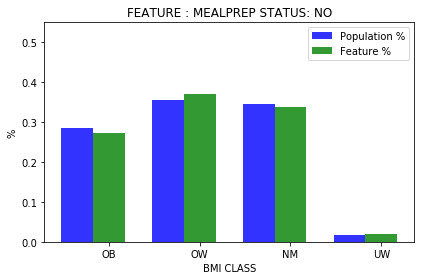

----------------------------------------------------------------------------------
TOTAL CASES:     681
MEALPREP 3 OBESE 	 193 	 28.3406754772 %    OFF :-0.076380597527
MEALPREP 3 OVER 	 229 	 33.6270190896 %    OFF :-1.90160240575
MEALPREP 3 NORMAL 	 248 	 36.4170337739 %    OFF :1.98362255891
MEALPREP 3 UNDER 	 11 	 1.61527165932 %    OFF :-0.00563955562875



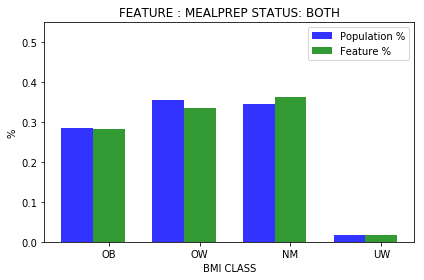

----------------------------------------------------------------------------------
TOTAL CASES:     634
DIETSODA 1 OBESE 	 231 	 36.4353312303 %    OFF :8.01827515552
DIETSODA 1 OVER 	 235 	 37.0662460568 %    OFF :1.53762456146
DIETSODA 1 NORMAL 	 161 	 25.3943217666 %    OFF :-9.03908944839
DIETSODA 1 UNDER 	 7 	 1.10410094637 %    OFF :-0.516810268581



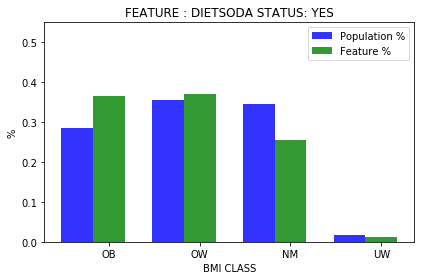

----------------------------------------------------------------------------------
TOTAL CASES:     961
DIETSODA 2 OBESE 	 308 	 32.0499479709 %    OFF :3.6328918961
DIETSODA 2 OVER 	 334 	 34.7554630593 %    OFF :-0.773158436014
DIETSODA 2 NORMAL 	 301 	 31.3215400624 %    OFF :-3.11187115252
DIETSODA 2 UNDER 	 18 	 1.87304890739 %    OFF :0.252137692435



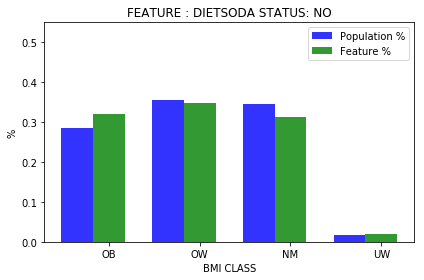

----------------------------------------------------------------------------------
TOTAL CASES:     51
DIETSODA 3 OBESE 	 27 	 52.9411764706 %    OFF :24.5241203958
DIETSODA 3 OVER 	 12 	 23.5294117647 %    OFF :-11.9992097306
DIETSODA 3 NORMAL 	 12 	 23.5294117647 %    OFF :-10.9039994502
DIETSODA 3 UNDER 	 0 	 0.0 %    OFF :-1.62091121495



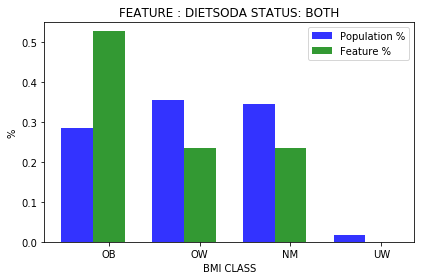

----------------------------------------------------------------------------------


''

In [22]:
#TAKES results from last function, which is a
#THIS IS P(BMI_CLASS|BEHAVIOR)
def feat_to_bmi(in_data,max_state):
    
    counts = in_data[0] #counts is a dictionary, whose keys are features, whos values are # of instances).
    rows = in_data[1]   #rows is a dictionary, whose keys are features, whos values are array of DFs (who are on and offs).
    #print(type(rows)) 
    
    for df_feat in rows: #FOR ALL FEATURES
        #for x in range(feat.len()) ???awfasdfasdfasdfaSDFAsdfasdfsdf
        
        for x in range(1,max_state+1):# FOR ALL BINARY(3) STATES
            
            df_temp = rows[df_feat][x] 
            temp_c  = counts[df_feat][x]
            temp_plot_values = [] #the % to show in the plots
            
            if (x==3 and len(df_temp)==0): #skip for only binaries
                break
    
            #print(len(df_temp))
            #print(type(df_temp))
            
            temp_check = []
            temp_check2 = []
            
            print ("TOTAL CASES: ","","","",str(temp_c))
            for bmi in range(len(BMI_RANGES)): #FOR ALL WEIGHT CATEGORIES
               
                
                temp_sum = df_temp[ (df_temp['BMI']>=BMI_RANGES[bmi][0]) & (df_temp['BMI']<BMI_RANGES[bmi][1])]
                temp_sum = len(temp_sum)
                temp_percent = temp_sum / temp_c
    
                temp_check.append(temp_sum)
                temp_check2.append(temp_percent)
                
                offset = (temp_percent-BACKGROUND_BMI_RATES[bmi])*100
                
                
                print(df_feat,x,BMI_RANGES[bmi][2],"\t",temp_sum,"\t",temp_percent*100,"%", "   OFF :"+str(offset)) 
              
                
                
                temp_plot_values.append(temp_percent)
                
                

            print("")    
            #print("check if cases # matche:","",sum(temp_check) == temp_c)
            #print("check if % adds to one :","",1-sum(temp_check2) <= 0.01)
            
            
            n_groups = 4

            # create plot
            fig, ax = plt.subplots()
            index = np.arange(n_groups)
            bar_width = 0.35
            
            opacity = 0.8

            rects1 = plt.bar(index, BACKGROUND_BMI_RATES , bar_width,
                             alpha=opacity,
                             color='b',
                             label='Population %')

            rects2 = plt.bar(index + bar_width, temp_plot_values, bar_width,
                             alpha=opacity,
                             color='g',
                             label='Feature %')

            plt.xlabel('BMI CLASS')
            plt.ylabel('%')
            if (max_state<=3):
                word = ""
                if x == 1:
                    word = "YES"
                if x == 2:
                    word = "NO"
                if x ==3:
                    word = "BOTH"
            else:
                word = str(x)
                
            plt.title('FEATURE : ' + df_feat + " STATUS: " + word)
            plt.xticks(index + bar_width, ('OB', 'OW', 'NM', 'UW'))
            plt.legend()
            plt.ylim([0,0.55])

            plt.tight_layout()
            plt.show()
            
            print("----------------------------------------------------------------------------------")
   
    return ""


feat_to_bmi(RESULTS_ON_OFF,2)
feat_to_bmi(RESULTS_THREE,3)


#BMI FOODSHOP STORES

[0.28417056074766356, 0.355286214953271, 0.3443341121495327, 0.01620911214953271]
TOTAL CASES:     1275
GENHEALTH 1 OBESE 	 119 	 9.33333333333 %    OFF :-19.0837227414
GENHEALTH 1 OVER 	 432 	 33.8823529412 %    OFF :-1.64626855415
GENHEALTH 1 NORMAL 	 698 	 54.7450980392 %    OFF :20.3116868243
GENHEALTH 1 UNDER 	 26 	 2.03921568627 %    OFF :0.418304471321



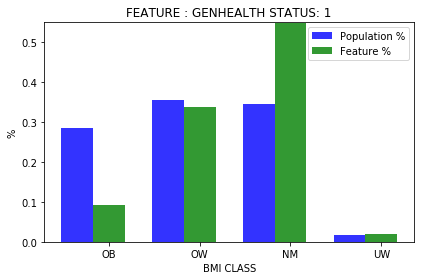

----------------------------------------------------------------------------------
TOTAL CASES:     2361
GENHEALTH 2 OBESE 	 483 	 20.457433291 %    OFF :-7.95962278379
GENHEALTH 2 OVER 	 959 	 40.6183820415 %    OFF :5.08976054618
GENHEALTH 2 NORMAL 	 882 	 37.3570520966 %    OFF :2.92364088162
GENHEALTH 2 UNDER 	 37 	 1.56713257094 %    OFF :-0.0537786440088



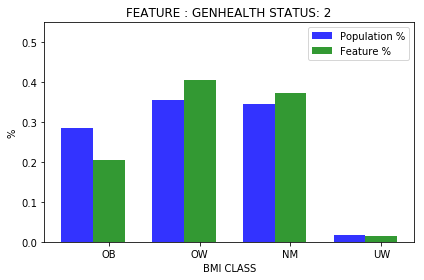

----------------------------------------------------------------------------------
TOTAL CASES:     2084
GENHEALTH 3 OBESE 	 802 	 38.4836852207 %    OFF :10.066629146
GENHEALTH 3 OVER 	 710 	 34.0690978887 %    OFF :-1.45952360665
GENHEALTH 3 NORMAL 	 540 	 25.9117082534 %    OFF :-8.52170296159
GENHEALTH 3 UNDER 	 32 	 1.53550863724 %    OFF :-0.0854025777172



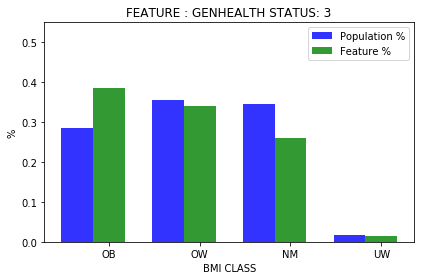

----------------------------------------------------------------------------------
TOTAL CASES:     811
GENHEALTH 4 OBESE 	 382 	 47.1023427867 %    OFF :18.6852867119
GENHEALTH 4 OVER 	 245 	 30.2096177559 %    OFF :-5.31900373947
GENHEALTH 4 NORMAL 	 174 	 21.4549938348 %    OFF :-12.9784173802
GENHEALTH 4 UNDER 	 10 	 1.23304562269 %    OFF :-0.387865592265



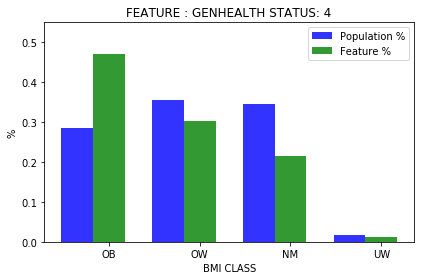

----------------------------------------------------------------------------------
TOTAL CASES:     282
GENHEALTH 5 OBESE 	 149 	 52.8368794326 %    OFF :24.4198233579
GENHEALTH 5 OVER 	 70 	 24.8226950355 %    OFF :-10.7059264599
GENHEALTH 5 NORMAL 	 57 	 20.2127659574 %    OFF :-14.2206452575
GENHEALTH 5 UNDER 	 6 	 2.12765957447 %    OFF :0.506748359515



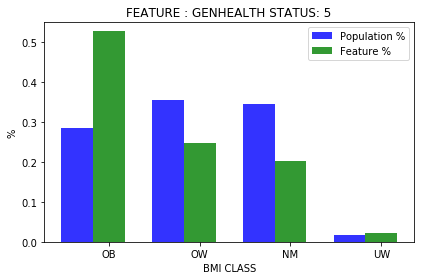

----------------------------------------------------------------------------------
TOTAL CASES:     3479
STORE 1 OBESE 	 990 	 28.4564530037 %    OFF :0.0393969289703
STORE 1 OVER 	 1194 	 34.320206956 %    OFF :-1.20841453931
STORE 1 NORMAL 	 1243 	 35.7286576602 %    OFF :1.29524644529
STORE 1 UNDER 	 52 	 1.49468237999 %    OFF :-0.126228834959



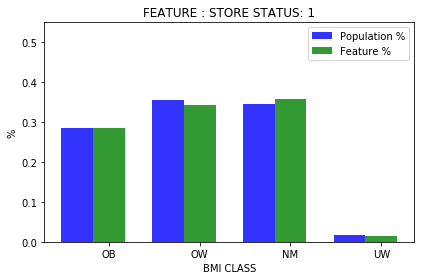

----------------------------------------------------------------------------------
TOTAL CASES:     1106
STORE 2 OBESE 	 336 	 30.3797468354 %    OFF :1.96269076068
STORE 2 OVER 	 411 	 37.1609403255 %    OFF :1.63231883017
STORE 2 NORMAL 	 351 	 31.7359855335 %    OFF :-2.6974256815
STORE 2 UNDER 	 8 	 0.723327305606 %    OFF :-0.897583909347



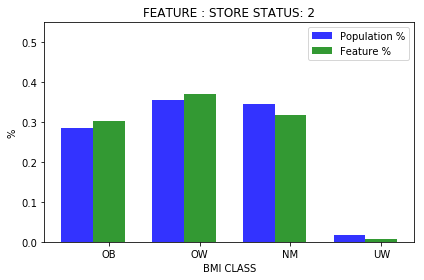

----------------------------------------------------------------------------------
TOTAL CASES:     270
STORE 3 OBESE 	 69 	 25.5555555556 %    OFF :-2.86150051921
STORE 3 OVER 	 107 	 39.6296296296 %    OFF :4.1010081343
STORE 3 NORMAL 	 89 	 32.962962963 %    OFF :-1.47044825199
STORE 3 UNDER 	 5 	 1.85185185185 %    OFF :0.230940636899



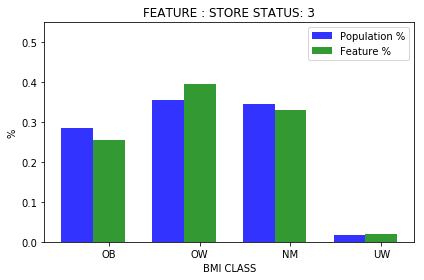

----------------------------------------------------------------------------------
TOTAL CASES:     25
STORE 4 OBESE 	 11 	 44.0 %    OFF :15.5829439252
STORE 4 OVER 	 3 	 12.0 %    OFF :-23.5286214953
STORE 4 NORMAL 	 11 	 44.0 %    OFF :9.56658878505
STORE 4 UNDER 	 0 	 0.0 %    OFF :-1.62091121495



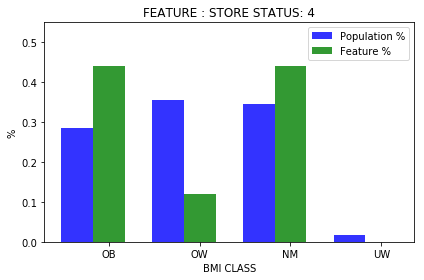

----------------------------------------------------------------------------------
TOTAL CASES:     149
STORE 5 OBESE 	 39 	 26.1744966443 %    OFF :-2.24255943047
STORE 5 OVER 	 51 	 34.2281879195 %    OFF :-1.30043357586
STORE 5 NORMAL 	 55 	 36.9127516779 %    OFF :2.4793404629
STORE 5 UNDER 	 4 	 2.68456375839 %    OFF :1.06365254344



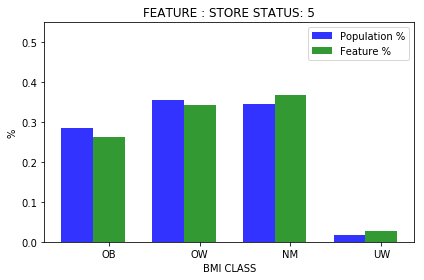

----------------------------------------------------------------------------------
TOTAL CASES:     1589
STREASON 1 OBESE 	 504 	 31.718061674 %    OFF :3.30100559924
STREASON 1 OVER 	 545 	 34.2983008181 %    OFF :-1.2303206772
STREASON 1 NORMAL 	 522 	 32.8508495909 %    OFF :-1.58256162402
STREASON 1 UNDER 	 18 	 1.13278791693 %    OFF :-0.488123298024



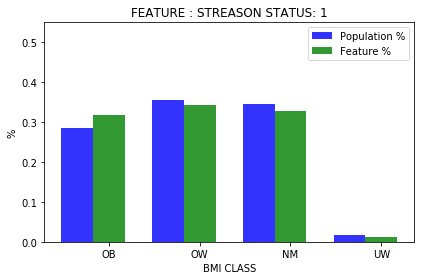

----------------------------------------------------------------------------------
TOTAL CASES:     1908
STREASON 2 OBESE 	 532 	 27.8825995807 %    OFF :-0.534456494054
STREASON 2 OVER 	 690 	 36.1635220126 %    OFF :0.634900517252
STREASON 2 NORMAL 	 663 	 34.748427673 %    OFF :0.315016458003
STREASON 2 UNDER 	 23 	 1.20545073375 %    OFF :-0.415460481201



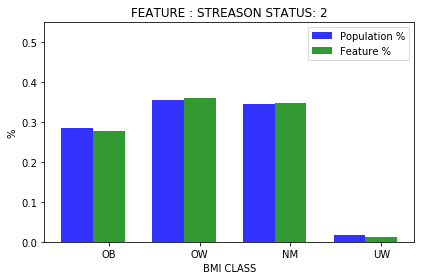

----------------------------------------------------------------------------------
TOTAL CASES:     668
STREASON 3 OBESE 	 143 	 21.4071856287 %    OFF :-7.00987044602
STREASON 3 OVER 	 231 	 34.5808383234 %    OFF :-0.947783171974
STREASON 3 NORMAL 	 286 	 42.8143712575 %    OFF :8.38096004253
STREASON 3 UNDER 	 8 	 1.19760479042 %    OFF :-0.423306424534



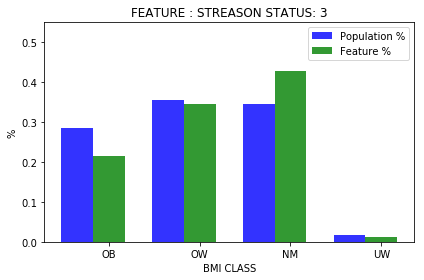

----------------------------------------------------------------------------------
TOTAL CASES:     429
STREASON 4 OBESE 	 118 	 27.5058275058 %    OFF :-0.911228568939
STREASON 4 OVER 	 150 	 34.965034965 %    OFF :-0.563586530292
STREASON 4 NORMAL 	 150 	 34.965034965 %    OFF :0.531623750082
STREASON 4 UNDER 	 11 	 2.5641025641 %    OFF :0.943191349149



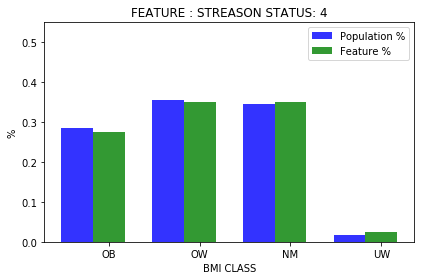

----------------------------------------------------------------------------------
TOTAL CASES:     112
STREASON 5 OBESE 	 35 	 31.25 %    OFF :2.83294392523
STREASON 5 OVER 	 43 	 38.3928571429 %    OFF :2.86423564753
STREASON 5 NORMAL 	 31 	 27.6785714286 %    OFF :-6.75483978638
STREASON 5 UNDER 	 3 	 2.67857142857 %    OFF :1.05766021362



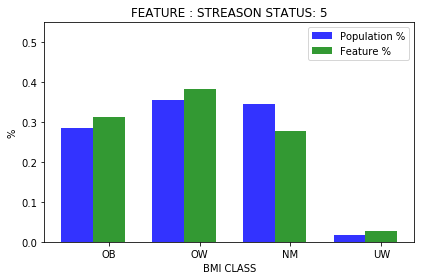

----------------------------------------------------------------------------------
TOTAL CASES:     259
STREASON 6 OBESE 	 92 	 35.5212355212 %    OFF :7.10417944647
STREASON 6 OVER 	 84 	 32.4324324324 %    OFF :-3.09618906289
STREASON 6 NORMAL 	 77 	 29.7297297297 %    OFF :-4.70368148522
STREASON 6 UNDER 	 6 	 2.3166023166 %    OFF :0.695691101649



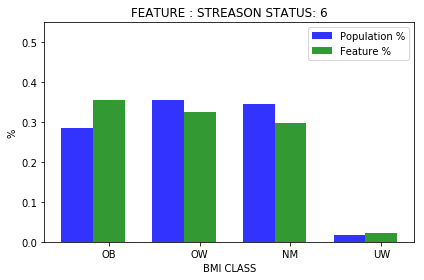

----------------------------------------------------------------------------------


''

In [23]:
print(BACKGROUND_BMI_RATES)
feat_to_bmi(RESULTS_FIVE,5)
feat_to_bmi(RESULTS_SIX,6)

STORE
--------------------
01	Grocery store	X	X
02	Supercenter	X	X
03	Warehouse club	X	X
04	Drugstore or convenience store	X	X
05	Some other place	X	X

STREASON
----------
01	Price	X	X
02	Location	X	X
03	Quality of Products	X	X
04	Variety of Products	X	X
05	Customer Service	X	X
06	Other	X	X




# Left to do
use LogistiscRegression for feature specific distribution vs whole population distribution. (Or Mann–Whitney U test, but Brad said first is better.)

clf = linear_model.LogisticRegression(C=1e5)

However, I need to subsample the whole population first because function require the same sample size.
How 2 Subsample? central limit theorm.



continuous varaible analysis, , already mentioned in pt1.


'FASTFDFREQ' Times purchased prepared food in last 7 days
'EXFREQ' 	Times participated in physical activities in last 7 days
'PED'	Total time in primary eating and drinking (in minutes)	
'SED_EAT'	Total time in secondary eating (in minutes)

Need to drop 99 from 'FASTFDFREQ' and 'EXFREQ' 


In [56]:
CONTINUOUS_FEATURES = [ 'AGE', 'PED', 'SED_EAT', 'EXFREQ', 'FASTFDFREQ']
df_atus[CONTINUOUS_FEATURES + ['BMI']]
df_x = df_atus.loc[df_atus['FASTFDFREQ'] < 90 ]
df_x = df_x.loc[df_x['EXFREQ'] < 90]
df_x[CONTINUOUS_FEATURES + ['BMI']]

X = df_x['FASTFDFREQ']
y = df_x['BMI']

#print (len(X))
#print (len(y))

for x in CONTINUOUS_FEATURES:
    print ('['+x+']')
    print ('Pearson')
    print (df_x[[x,'BMI']].corr(method='pearson'))
    print ()
    print ('Spearman')
    print (df_x[[x,'BMI']].corr(method='spearman'))
    print ()
    print ('Kendall-tau')
    print (df_x[[x,'BMI']].corr(method='kendall'))
    print ()
    print ('-------------------------')
    print ()
#clf = linear_model.LogisticRegression(C=1e5)
#clf.fit(X, y)



[AGE]
Pearson
          AGE       BMI
AGE  1.000000  0.112728
BMI  0.112728  1.000000

Spearman
        AGE     BMI
AGE  1.0000  0.1569
BMI  0.1569  1.0000

Kendall-tau
          AGE       BMI
AGE  1.000000  0.106072
BMI  0.106072  1.000000

-------------------------

[PED]
Pearson
          PED       BMI
PED  1.000000 -0.051577
BMI -0.051577  1.000000

Spearman
          PED       BMI
PED  1.000000 -0.039207
BMI -0.039207  1.000000

Kendall-tau
          PED       BMI
PED  1.000000 -0.027278
BMI -0.027278  1.000000

-------------------------

[SED_EAT]
Pearson
          SED_EAT       BMI
SED_EAT  1.000000 -0.015617
BMI     -0.015617  1.000000

Spearman
          SED_EAT       BMI
SED_EAT  1.000000 -0.036529
BMI     -0.036529  1.000000

Kendall-tau
         SED_EAT      BMI
SED_EAT  1.00000 -0.02642
BMI     -0.02642  1.00000

-------------------------

[EXFREQ]
Pearson
          EXFREQ       BMI
EXFREQ  1.000000 -0.087014
BMI    -0.087014  1.000000

Spearman
          EXFREQ       BMI


Age and EXFREQ has the biggest impact on BMI. Spearman for EXEFREQ vs BMI is -0.12. Since EXEFREQ and FASTFDFREQ are base on the same unit (times per week), they can be compared. Lets see visualize a scatterplot.

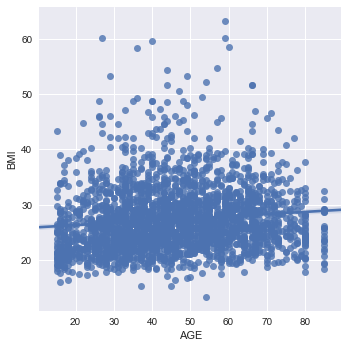

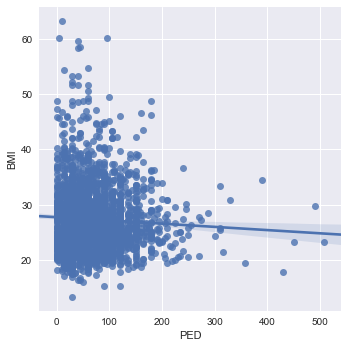

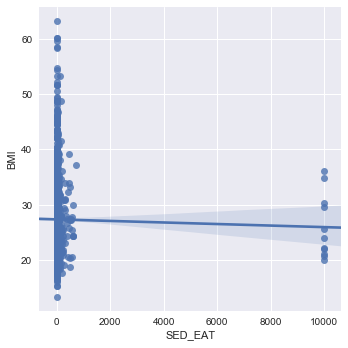

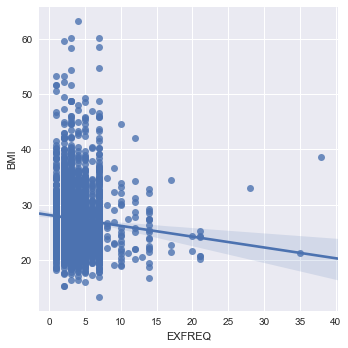

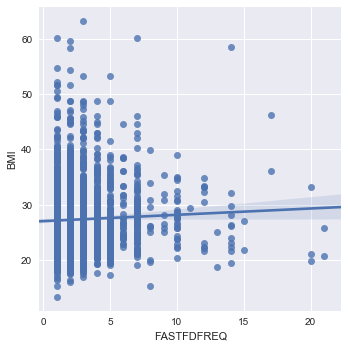

In [72]:
for x in CONTINUOUS_FEATURES:
   
    #df_x[[x,'BMI']].plot(kind='scatter', x=x, y='BMI')
    sns.lmplot(x=x,y='BMI',data=df_x,fit_reg=True) 
    plt.show()

We can observe that more time spent during eating correlate with lower BMI.
Frequency of eating prepare meals correlate with Higher BMI. Towards Obesity. 
Frequency of excercise correlate with Higher BMI. Away from Obesity to normal.

Frequency of excerise has the strongest corrleation.